<a href="https://colab.research.google.com/github/Abbasmahdipour/PhD-Micro-Project/blob/main/Ch2_Exercise2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Install scikit-learn

In [1]:
pip install pandas scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2) Load CSV file

In [2]:
from google.colab import files

uploaded = files.upload()


Saving heart_data.csv to heart_data (1).csv


3) Read CSV file

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('heart_data.csv')

# Display the first few rows of the DataFrame to verify the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
4,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


4) Train dataset and show Accuracy in result

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset from the CSV file
df = pd.read_csv('heart_data.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


5) Display the result as a graph

Accuracy: 1.0


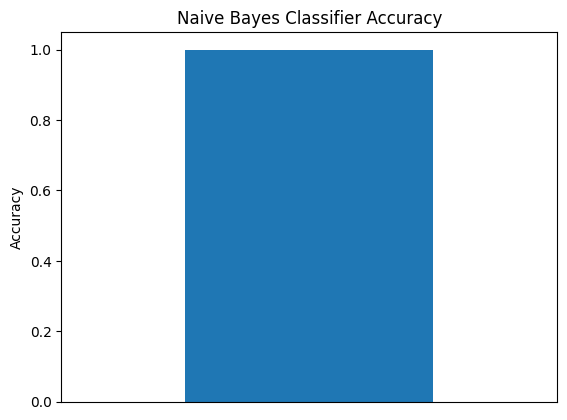

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('heart_data.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the accuracy
results = pd.DataFrame({'Accuracy': [accuracy]})
results.plot(kind='bar', legend=False)
plt.title('Naive Bayes Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xticks([])
plt.show()


6) Show ROC

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


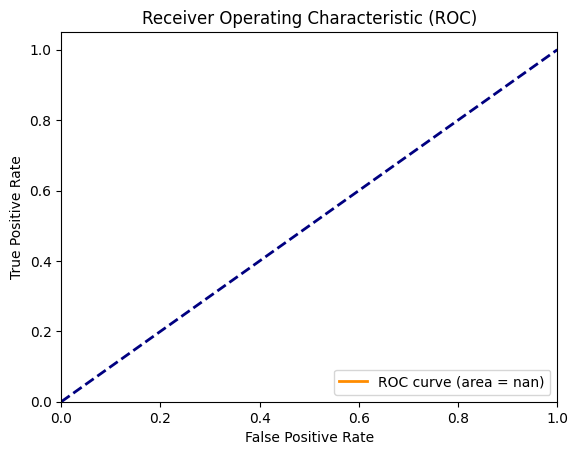

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('heart_data.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the false positive rate and true positive rate for the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


7) Show AUC

In [7]:
print("AUC:", roc_auc)


AUC: nan


8) Show other values

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


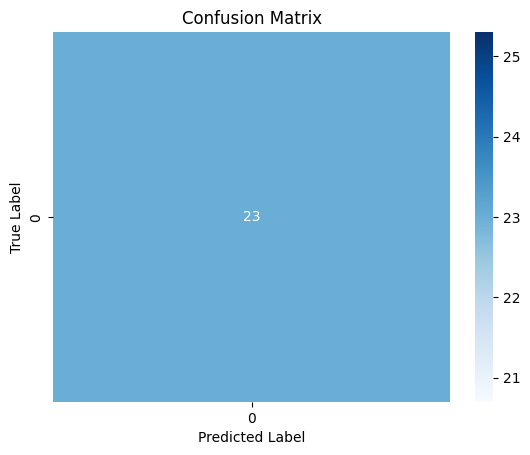

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
df = pd.read_csv('heart_data.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


END!!